In [1]:
# initial setup
%run "../../../common/0_notebooks_base_setup.py"


/Users/csuarezgurruchaga/Desktop/Digital-House/CLASE_37/dsad_2021/common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.1.5 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
Running command `conda install --yes nltk=3.5.0`... error
    
CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://repo.anaconda.com/pkgs/main/osx-64/current_repodata.json>
Elapsed: -

An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple retry will get you on your way.

If your current network has https://www.anaconda.com blocked, please file
a support request with your network engine

---

<img src='../../../common/logo_DH.png' align='left' width=35%/>


## Introducción

---

En esta notebook vamos a trabajar con el siguiente dataset:

https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

El objetivo de este analisis será predecir si lloverá o no al día siguiente.



## Ejercicio 1. EDA y Preprocesamiento

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.tree import DecisionTreeClassifier

import sklearn.metrics as metrics
from sklearn.model_selection import learning_curve



1. Leemos los datos del archivo weatherAUS.csv.zip

In [3]:
df = pd.read_csv('../Data/weatherAUS.csv.zip')

Contamos cuántos valores no-nulos hay

In [4]:
df.shape

(145460, 23)

In [5]:
df.notna().sum()

Date             145460
Location         145460
MinTemp          143975
MaxTemp          144199
Rainfall         142199
Evaporation       82670
Sunshine          75625
WindGustDir      135134
WindGustSpeed    135197
WindDir9am       134894
WindDir3pm       141232
WindSpeed9am     143693
WindSpeed3pm     142398
Humidity9am      142806
Humidity3pm      140953
Pressure9am      130395
Pressure3pm      130432
Cloud9am          89572
Cloud3pm          86102
Temp9am          143693
Temp3pm          141851
RainToday        142199
RainTomorrow     142193
dtype: int64

2. Eliminar las columnas que no nos interesan, entre ellas las que tienen pocos datos (menos de cien mil). Además, eliminar 'Location' y 'Date', ya que no nos interesa el lugar ni fecha (al menos en este análisis).

In [6]:
df =df.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm','Location','Date'], axis=1)

In [7]:
df.head()

MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed WindDir9am  \
0     13.4     22.9       0.6           W           44.0          W   
1      7.4     25.1       0.0         WNW           44.0        NNW   
2     12.9     25.7       0.0         WSW           46.0          W   
3      9.2     28.0       0.0          NE           24.0         SE   
4     17.5     32.3       1.0           W           41.0        ENE   

  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0        WNW          20.0          24.0         71.0         22.0   
1        WSW           4.0          22.0         44.0         25.0   
2        WSW          19.0          26.0         38.0         30.0   
3          E          11.0           9.0         45.0         16.0   
4         NW           7.0          20.0         82.0         33.0   

   Pressure9am  Pressure3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0       1007.7       1007.1     16.9     21.8        No           No  
1       1010.6       1007.8     17.2     24.3        No           No  
2       1007.6       1008.7     21.0     23.2        No           No  
3       1017.6       1012.8     18.1     26.5        No           No  
4       1010.8       1006.0     17.8     29.7        No           No

3. Eliminar todas las filas que tengan valores nulos.

In [8]:
df.dropna(inplace=True)

4. Para simplificar el preprocesamiento, también eliminar todas las columnas que tengan valores categóricos. ¿Por qué no nos molesta eliminar `RainToday`?

In [9]:
df.loc[:,df.dtypes==object].columns

Index(['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'], dtype='object')

In [10]:
df.drop(['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], axis=1, inplace = True)

5. Realizar un countplot para ver cuántos casos hay de lluvia y no-lluvia.

https://seaborn.pydata.org/generated/seaborn.countplot.html

In [11]:
df.head(2)

MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0     13.4     22.9       0.6           44.0          20.0          24.0   
1      7.4     25.1       0.0           44.0           4.0          22.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm  \
0         71.0         22.0       1007.7       1007.1     16.9     21.8   
1         44.0         25.0       1010.6       1007.8     17.2     24.3   

  RainTomorrow  
0           No  
1           No

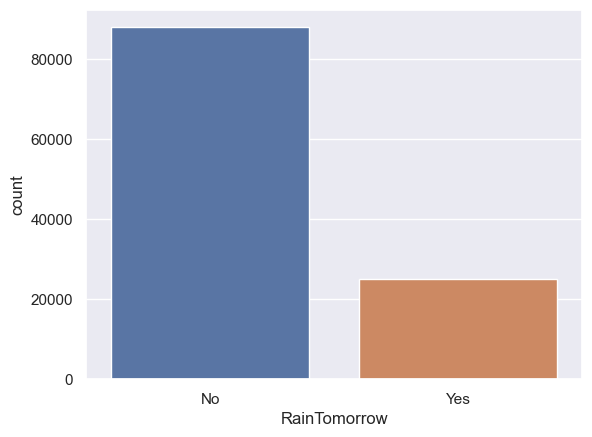

In [12]:
sns.countplot(x = df.RainTomorrow)
plt.show()

Y hacer el `pairplot` para ver cómo se relacionan las variables. Recuerden que este gráfico puede llevar bastante tiempo. También recuerden que pueden agrandar el gráfico haciendo doble click en él.

Ayuda: usar como datos la muestra dada por `data.sample(frac = 0.1)`

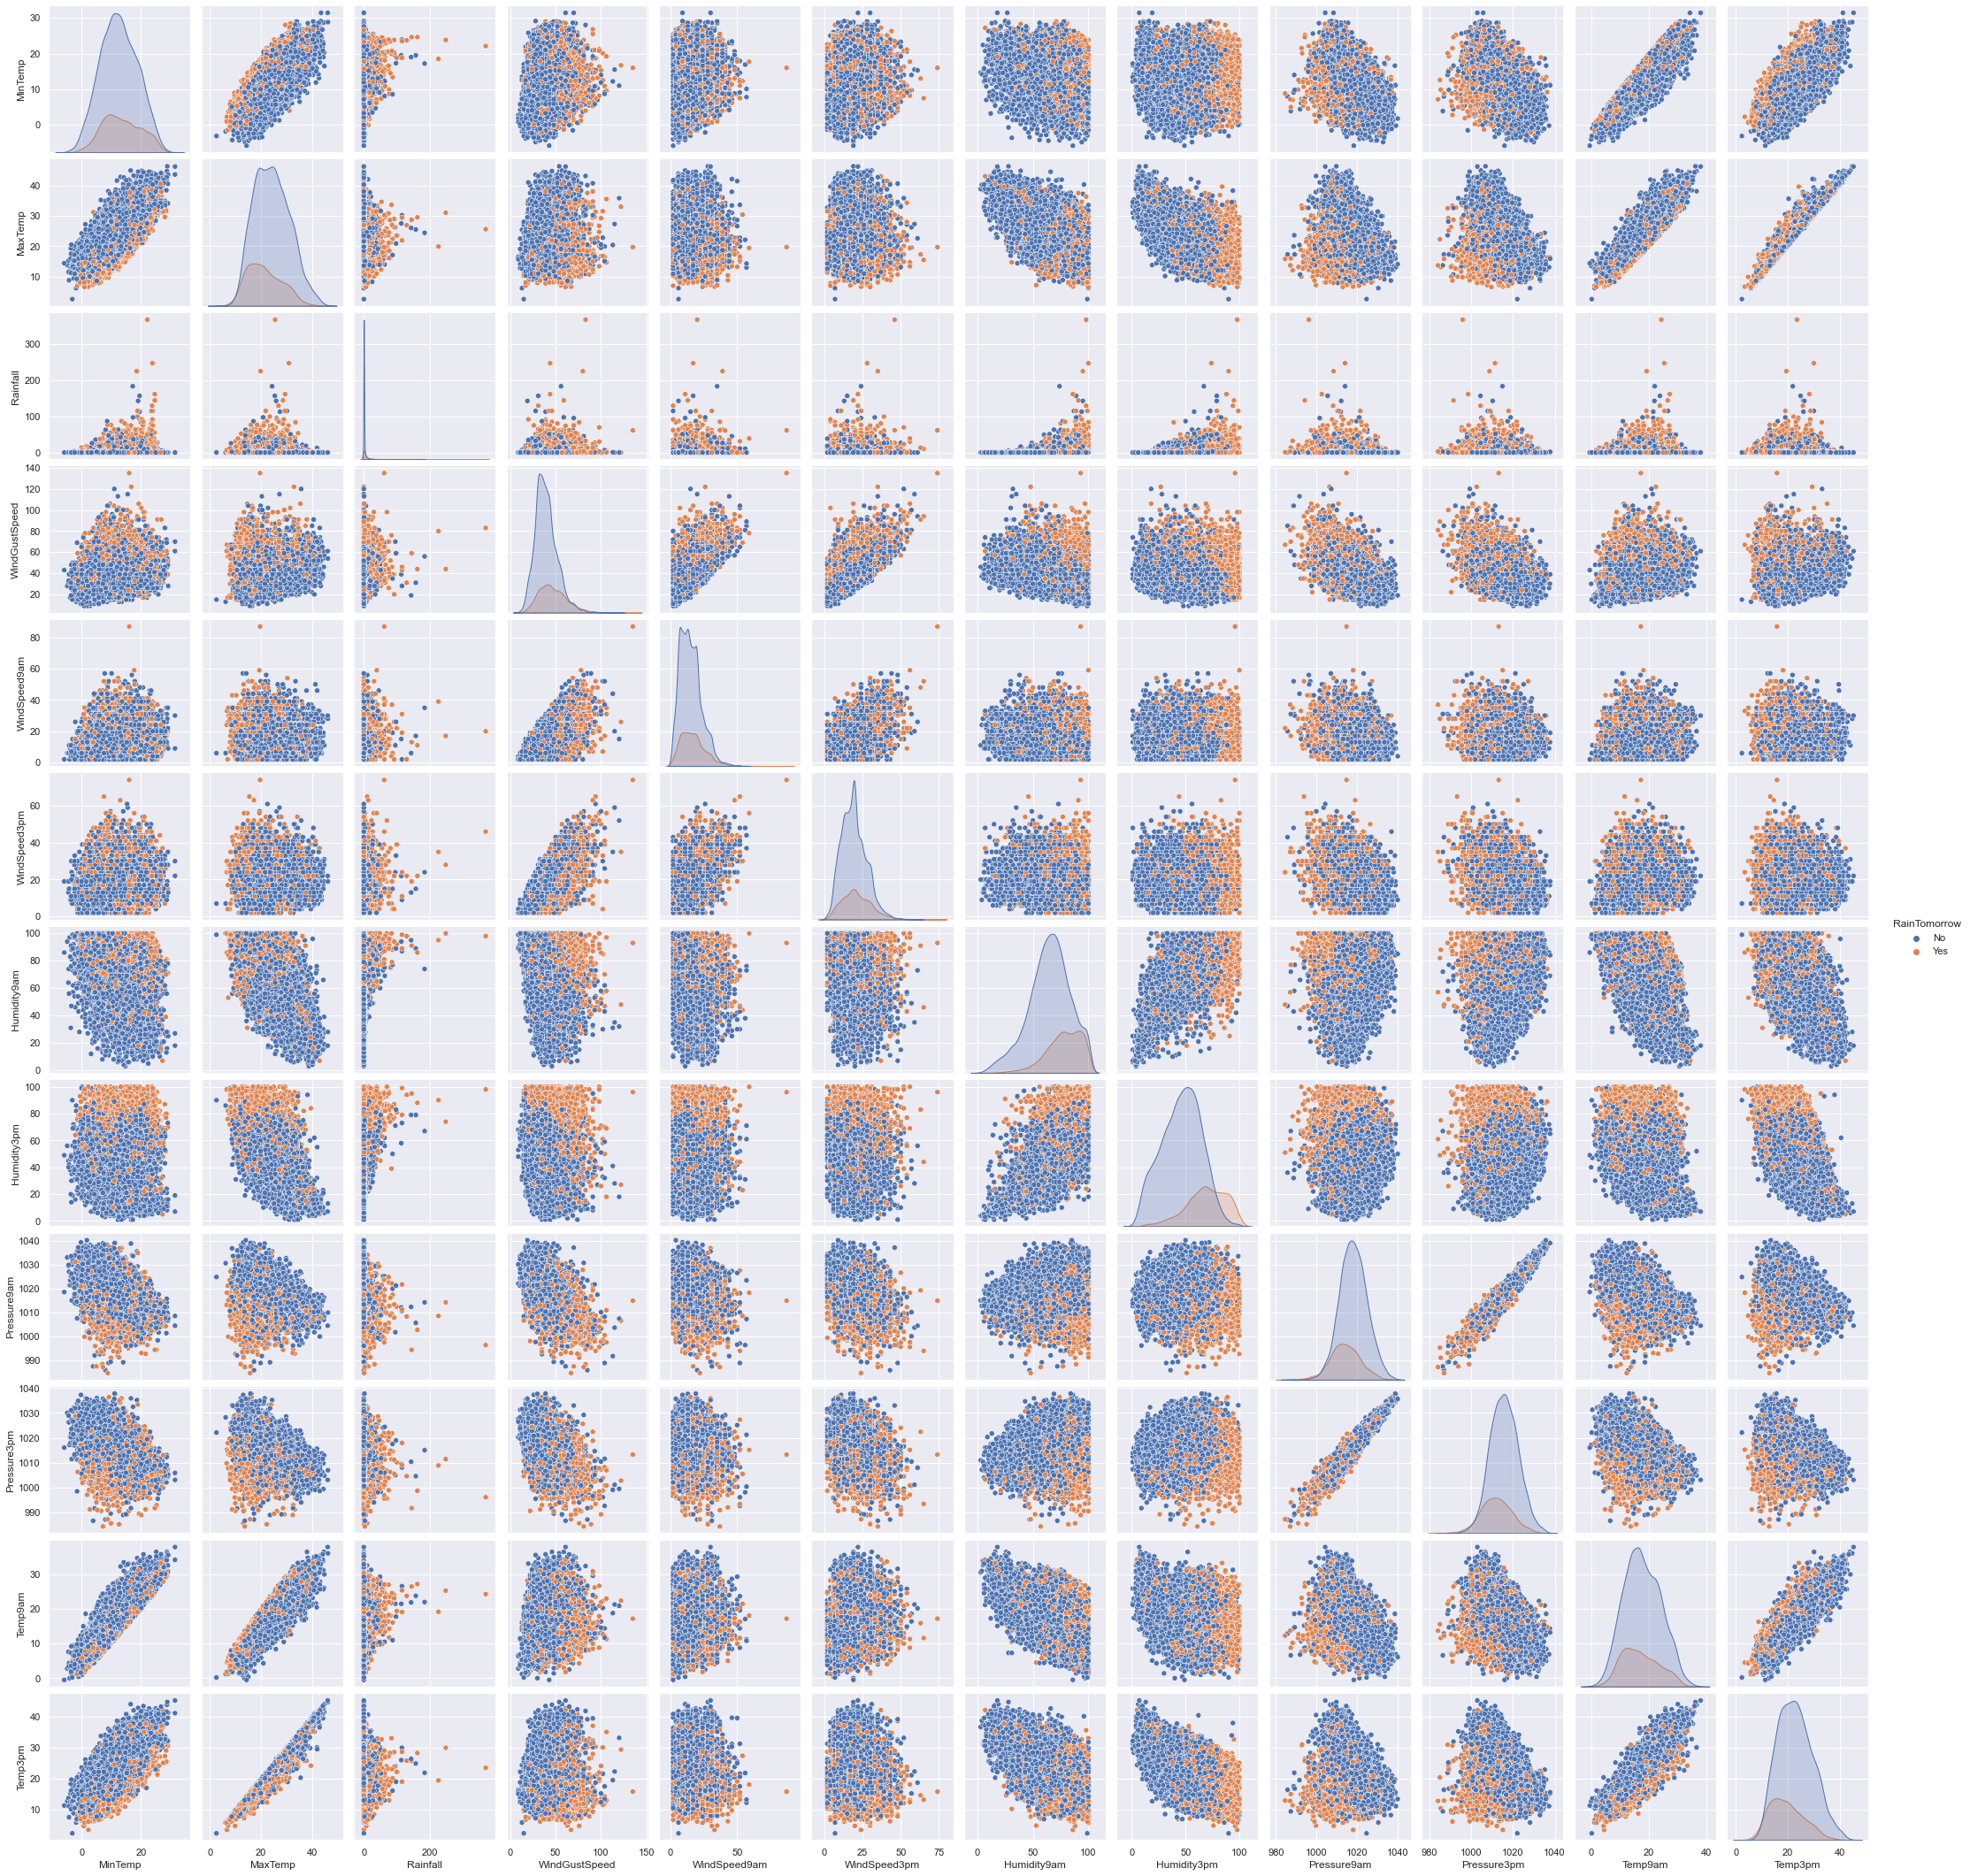

In [13]:
%matplotlib inline

sns.pairplot(df.sample(frac = 0.1), hue = 'RainTomorrow');

¿Existe alguna feature, o par de features, que por sí solos sean buenos para predecir si lloverá o no al día siguiente?

Hay algunas que parecen *correlacionadas*. Tratamos de cuantificarlo.

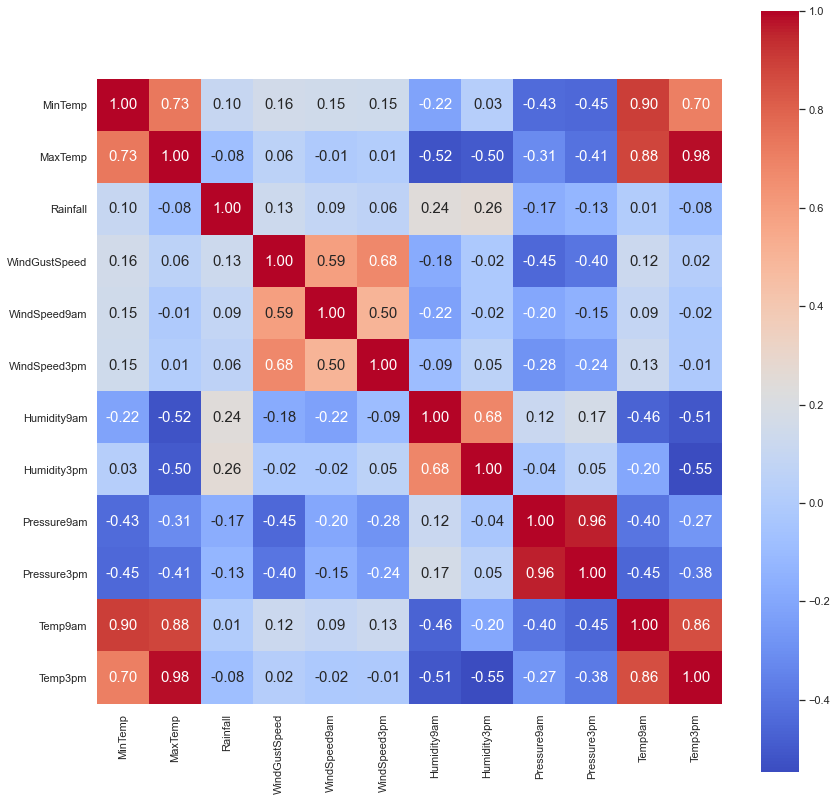

In [14]:
##############
# descomentar #
##############


corr = df.drop(columns = ['RainTomorrow']).corr(method='pearson') # .corr is used for find corelation
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= df.drop(columns = ['RainTomorrow']).columns, 
           yticklabels= df.drop(columns = ['RainTomorrow']).columns,
           cmap= 'coolwarm')
plt.show()

En base a la correlación, podemos descartar (o no) algunas variables. **Para pensar**, ¿por qué haríamos (o no) esto?

In [15]:
df = df.drop(columns=['Temp3pm', 'Pressure9am'])

6. Convertir `RainTomorrow` a una variable númerica 1/0

In [16]:
# df.RainTomorrow = df.RainTomorrow.apply(lambda x: x == 'Yes').astype(int)

In [17]:
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes':1, 'No':0})

In [25]:
df.sample(5)

MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
20428      4.6     14.0       0.0           31.0           9.0          11.0   
57648     11.2     23.8       0.2           28.0          19.0          11.0   
6141      21.0     32.8       0.0           31.0          19.0           9.0   
37486      0.6     17.8       0.0           31.0           9.0          19.0   
7711       9.9     24.5       0.0           43.0          26.0           9.0   

       Humidity9am  Humidity3pm  Pressure3pm  Temp9am  RainTomorrow  
20428         52.0         48.0       1010.8      9.5             0  
57648         98.0         52.0       1010.0     12.7             0  
6141          60.0         36.0       1014.8     23.6             0  
37486         75.0         29.0       1020.8     10.5             0  
7711          22.0          6.0       1022.1     14.4             0

### Datos de entrenamiento y casos *benchmark*

Generamos casos base contra los cuales comparar nuestros resultados.

1. Elegir variables de entrenamiento (empezar con dos) y construir la matriz de features X y el vector target y

In [26]:
columnas_entrenamiento = ['MaxTemp', 'Humidity3pm']

X = df[columnas_entrenamiento]
y = df.RainTomorrow


Generar un modelo de baseline

In [35]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 0)

In [37]:
dummy_clf=DummyClassifier(strategy='most_frequent').fit(X_train, y_train)

In [38]:
accuracy_score(y_test, dummy_clf.predict(X_test))

0.7784429016718617

In [40]:
y.value_counts(normalize = True) #Variable target

0    0.778446
1    0.221554
Name: RainTomorrow, dtype: float64

## Ejercicio 2. Bagging

Separamos entre train y test

Recuerden que el objetivo de bagging es entrenar distintos modelos, donde cada uno vea distintas porciones del set de entrenamiento. Entonces, vamos a entrenar distintos árboles de decisión y mostrarles distintas porciones del set de datos. Lo vamos a hacer en un `for`.

1. Crear una lista vacía donde guardaremos los modelos entrenados y elegir cuántos modelos entrenar (Empezar por algún valor entre 5 y 10).

2. Entrenar cada modelo y guardar cada modelo entrenado en una lista. Para hacer el split, usar la función `train_test_split`. ¿Sobre qué conjunto van a hacer el split?¿Hay que fijar el `random_state`? 

3. Evaluar el accuracy de cada modelo usando el conjunto de test

Parecen estar un poco overfitteados, que era lo que esperábamos.

4. Evaluar el accuracy de todo el ensamble usando el conjunto de test. Vamos a hacerlo usando un promedio de las probabilidades que devuelven cada árbol. Si la probabilidad promedio es mayor a 0.5, clasificamos como positivo. Para ello:
    1. Inicializar un arreglo de probabilidades del tamaño de la cantidad de instancias del conjunto de test en ceros.

B. Recorrer la lista de modelos y predecir las probabilidades. Mirar como es el `shape` de ese arreglo predicho. Elegir las probabilidades que correspondan a la clase positiva. Luego, sumarlas al vector que definieron antes.

C. Dividir `probs_test_pred` por la cantidad de modelos

D. Crear las clases predichas (0s y 1s) a partir de comparar la probabilidad predicha con la probabilidad umbral (0.5).

Y evaluar la exactitud de todo el ensamble

5. Explorar el `BagginnClassfier` de scikit-learn y algunas de sus características. Usarlo para predecir sobre el train y test, y medir su desempeño.

In [41]:
from sklearn.ensemble import BaggingClassifier

In [44]:
bgg_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap_features=False, n_estimators= 100, n_jobs = -1).fit(X_train,y_train)

In [45]:
accuracy_score(y_test, bgg_clf.predict(X_test))

0.8056106545763673

6. Si usaron dos features, pueden graficar las fronteras de decisión

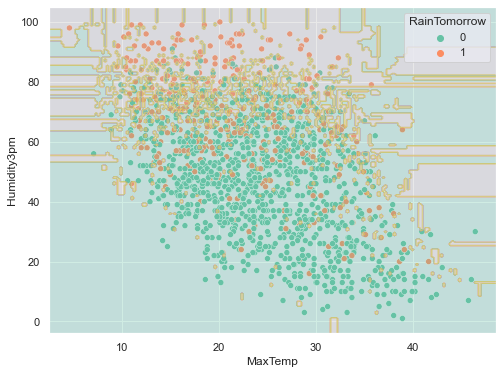

In [48]:
##############
# descomentar #
##############


N = 20 #para no graficar todos los puntos y saturar el grafico

plt.figure(figsize = (8,6))

# Grafico Clasificador Sesgado
ax = sns.scatterplot(x = X_test[::N].MaxTemp, y = X_test[::N].Humidity3pm, hue=y_test[::N], palette='Set2')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                      np.linspace(*ylim, num=200))
Z = bgg_clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
contours = ax.contourf(xx, yy, Z, alpha=0.3, cmap = 'Set2')


## Ejercicio 3. Random Forest

Random Forest, además de aplicar Bagging, también selecciona features al azar, de esa manera descorrelaciona aún más los distintos modelos de árbol creados.

1. Importar de scikit-learn el modelo `RandomForestClassifier`

In [49]:
from sklearn.ensemble import RandomForestClassifier


In [53]:
rf_clf = RandomForestClassifier(n_estimators=1000,n_jobs=-1,random_state=0, max_features='sqrt', oob_score=True).fit(X_train, y_train)

0.8058940209691131

2. Investigar sus parámetros. En particular, `n_estimators`, `max_features` y `oob_score`. Luego, crear y entrenar un modelo en el conjunto de train.

3. Evaluar su desempeño en el conjunto de train y de test.

In [ ]:
accuracy_score(y_test,rf_clf.predict(X_test))

4. ¿Cuál es su `oob_score_`?¿Y que son `feature_importances_`?

In [55]:
rf_clf.oob_score_

0.806843540788495

In [56]:
rf_clf.feature_importances_

array([0.41382558, 0.58617442])

In [58]:
pd.DataFrame({'Features':X_train.columns.values ,'Importancia de Features':rf_clf.feature_importances_}).sort_values('Importancia de Features', ascending = False)



Features  Importancia de Features
1  Humidity3pm                 0.586174
0      MaxTemp                 0.413826

5. ¿Qué hay en la propiedad `estimators_`?

In [59]:
rf_clf.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=209652396),
 DecisionTreeClassifier(max_features='sqrt', random_state=398764591),
 DecisionTreeClassifier(max_features='sqrt', random_state=924231285),
 DecisionTreeClassifier(max_features='sqrt', random_state=1478610112),
 DecisionTreeClassifier(max_features='sqrt', random_state=441365315),
 DecisionTreeClassifier(max_features='sqrt', random_state=1537364731),
 DecisionTreeClassifier(max_features='sqrt', random_state=192771779),
 DecisionTreeClassifier(max_features='sqrt', random_state=1491434855),
 DecisionTreeClassifier(max_features='sqrt', random_state=1819583497),
 DecisionTreeClassifier(max_features='sqrt', random_state=530702035),
 DecisionTreeClassifier(max_features='sqrt', random_state=626610453),
 DecisionTreeClassifier(max_features='sqrt', random_state=1650906866),
 DecisionTreeClassifier(max_features='sqrt', random_state=1879422756),
 DecisionTreeClassifier(max_features='sqrt', random_state=1277901399),
 DecisionTree

6. Elegir uno de los `estimators` y evaluar su desempeño sobre train y test.

In [62]:
print('Acc de test: ',accuracy_score(y_test, rf_clf.estimators_[0].predict(X_test)))
print('Acc de train: ',accuracy_score(y_train, rf_clf.estimators_[0].predict(X_train)))

Acc de test:  0.7899900821762539
Acc de train:  0.8411793182435384


In [65]:
print('Acc de train: ',accuracy_score(y_train, rf_clf.predict(X_train)))

Acc de train:  0.8617241094305315


¿Está overfiteado?¿Por qué la accuracy sobre el conjunto de train no es 1?

7. Hacer y graficar la curva de validación/complejidad para un modelo Random Forest en función del número de estimadores. No usamos CV porque puede llevar bastante tiempo. Si quieren, lo pueden probar después. Además, obtener su oob_score para graficar en la curva de complejidad (No se preocupen por los mensajes de warning).

In [63]:
##############
# descomentar #
##############

import warnings
warnings.filterwarnings('ignore')

train_accuracy = []
test_accuracy = []
oob_scores = []

N_estimadores = [1,2,3,4,5,10,25,50,100,250,500,1000]
for estimadores in N_estimadores:
    print(estimadores)
    clf = RandomForestClassifier(n_estimators=estimadores, n_jobs=-1, oob_score= True, random_state = 42)
    clf.fit(X_train,y_train)
    
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    train_accuracy.append(metrics.accuracy_score(y_train, y_train_pred))
    test_accuracy.append(metrics.accuracy_score(y_test, y_test_pred))
    oob_scores.append(clf.oob_score_)
    
train_accuracy = np.array(train_accuracy)
test_accuracy = np.array(test_accuracy)
oob_scores = np.array(oob_scores)

1
2
3
4
5
10
25
50
100
250
500
1000


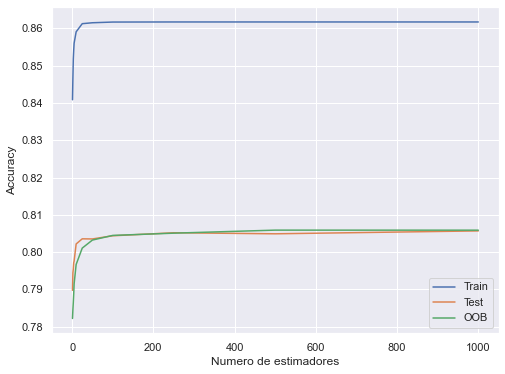

In [64]:
###############
# descomentar #
###############

plt.figure(figsize = (8,6))
plt.plot(N_estimadores, train_accuracy, label = 'Train')
plt.plot(N_estimadores, test_accuracy, label = 'Test')
plt.plot(N_estimadores, oob_scores, label = 'OOB')
plt.xlabel('Numero de estimadores')
plt.ylabel('Accuracy')
plt.legend()



8. Hacer y graficar la curva de aprendizaje (¿Qué es eso?) para un modelo con 250 estimadores. Puede llevar bastante tiempo, no se preocupen.

In [22]:
# completar:
# clf = ...

###############
# descomentar #
###############

#train_sizes, train_scores, valid_scores = learning_curve(clf, X_train, y_train, 
#                                                         train_sizes = np.linspace(0.0001,1,10),
#                                                         scoring = 'accuracy', cv=5)

In [23]:

###############
# descomentar #
###############

#plt.figure(figsize = (8,6))
#plt.plot(train_sizes, train_scores.mean(axis = 1), color = 'r')
#plt.plot(train_sizes, valid_scores.mean(axis = 1), color = 'g')

#plt.fill_between(train_sizes, train_scores.mean(axis = 1)- train_scores.std(axis = 1),
#                     train_scores.mean(axis = 1)+ train_scores.std(axis = 1), alpha=0.25,
#                     color="r")
#plt.fill_between(train_sizes, valid_scores.mean(axis = 1) - valid_scores.std(axis = 1),
#                     valid_scores.mean(axis = 1) + valid_scores.std(axis = 1), alpha=0.25, color="g")

#plt.ylim(0.5,1.1)


9. Si usaron dos features, pueden graficar las fronteras de decisión.

In [24]:
###############
# descomentar #
###############

# N = 20 #para no graficar todos los puntos y saturar el grafico
# clf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)

# plt.figure(figsize = (8,6))

#Grafico Clasificador Sesgado
# ax = sns.scatterplot(x = X_test[::N].MaxTemp, y = X_test[::N].Humidity3pm, hue=y_test[::N], palette='Set2')
# xlim = ax.get_xlim()
# ylim = ax.get_ylim()
# xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
#                      np.linspace(*ylim, num=200))
# Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
# contours = ax.contourf(xx, yy, Z, alpha=0.3, cmap = 'Set2')


**Ejercicio**: elegir más features y volver a entrenar.

**Para pensar**: ¿qué otras métricas utilizarían para evaluar estos modelos, dadas las características particulares del problema? Comparar con los casos *benchmark* que hicieron.